# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)
x_data.shape

(1000000,)

In [4]:
noise = np.random.randn(len(x_data))
print(noise.shape)

(1000000,)


In [5]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + b + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [7]:
my_data = pd.concat([x_df, y_df],axis=1)

In [19]:
my_data.tail()

,X Data,Y
999995,9.99996,9.950740
999996,9.99997,9.140471
999997,9.99998,10.020625
999998,9.99999,11.002455
999999,10.00000,9.689859


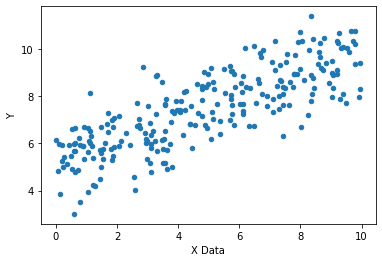

In [9]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y');

In [24]:
print('*'*120)

************************************************************************************************************************


In [14]:
# creates index 
p = np.random.randint(0, len(x_data), size=8)
p.shape
p

array([410840, 419607, 856321, 991520, 549217, 261364, 937613, 246843])

In [22]:
my_data.loc[p]

,X Data,Y
410840,4.108404,7.228023
419607,4.196074,7.739642
856321,8.563219,10.922410
991520,9.915210,10.977155
549217,5.492175,7.429868
261364,2.613643,5.382705
937613,9.376139,9.956896
246843,2.468432,6.212208


In [18]:
x_data[p]

array([4.10840411, 4.1960742 , 8.56321856, 9.91520992, 5.49217549,
       2.61364261, 9.37613938, 2.46843247])

In [25]:
print('*'*120)

************************************************************************************************************************


# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [28]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [26]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [29]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [30]:
y_model = m*xph + b

** Loss Function **

In [31]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [33]:
init = tf.global_variables_initializer()

### Session

In [34]:
batch_size = 8

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [35]:
model_m

0.50266886

In [36]:
model_b

4.8948083

### Results

In [37]:
y_hat = x_data * model_m + model_b

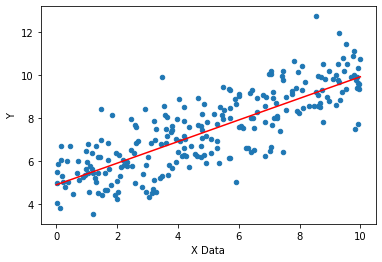

In [38]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

An Estimator is any class derived from tf.estimator.Estimator . TensorFlow provides a collection of pre-made Estimators (for example LinearRegressor) to implement common Machine Learning algorithms. These pre-implemented models allow quickly creating new models as need by customizing them.

Estimators deal with all the details of creating computational graphs, initializing variables, training the model and saving checkpoint and logging files for Tensorboard behind the scene. But to work with the estimators, we’ve to become comfortable with two new concepts, feature columns and input functions. Input functions are used for passing input data to the model for training and evaluation. Feature columns are specifications for how the model should interpret the input data. 

#### Workflow

Loading the libraries and dataset. <br>
Data proprocessing. <br>
Defining the feature columns. <br>
Building input function. <br>
Model instantiation, training and evaluation. <br>
Generating prediction.         <br>
Visualizing the model and the loss metrics using Tensorboard. <br>

In [45]:
# feature_column.numeric_column: Represents real valued or numerical features.

feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [49]:
type(feat_cols)
feat_cols

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [40]:
# assign LinearRegressor to estimator
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MIAOJU~1\\AppData\\Local\\Temp\\tmpb6jn90a4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002351663BC48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [43]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


In [44]:
print(type(x_train))

<class 'numpy.ndarray'>


### Set up Estimator Inputs

In [51]:
# Can also do .pandas_input_fn
# tf.estimator.inputs.numpy_input_fn: Returns input function that would feed dict of numpy arrays into the model
# tf offers the batch_size option
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [52]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [53]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [54]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MIAOJU~1\A

### Evaluation

In [55]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-26T09:19:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MIAOJU~1\AppData\Local\Temp\tmpb6jn90a4\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-26-09:19:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0880922, global_step = 1000, label/mean = 7.502599, loss = 4.352369, prediction/mean = 7.3952956
INFO:tensorflow:Saving 'checkpoint_p

In [53]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-08-29-07:35:50
INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmphej5e4se\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [54]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'loss': 4.673841, 'average_loss': 1.1684602, 'global_step': 1000}
eval metrics: {'loss': 4.7633586, 'average_loss': 1.1908396, 'global_step': 1000}


### Predictions

In [68]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [73]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmphej5e4se\model.ckpt-1000


[{'predictions': array([ 4.26618719], dtype=float32)},
 {'predictions': array([ 4.91423559], dtype=float32)},
 {'predictions': array([ 5.56228399], dtype=float32)},
 {'predictions': array([ 6.21033192], dtype=float32)},
 {'predictions': array([ 6.85838032], dtype=float32)},
 {'predictions': array([ 7.50642872], dtype=float32)},
 {'predictions': array([ 8.15447712], dtype=float32)},
 {'predictions': array([ 8.80252552], dtype=float32)},
 {'predictions': array([ 9.45057392], dtype=float32)},
 {'predictions': array([ 10.09862137], dtype=float32)}]

In [80]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmphej5e4se\model.ckpt-1000


In [81]:
predictions

[array([ 4.26618719], dtype=float32),
 array([ 4.91423559], dtype=float32),
 array([ 5.56228399], dtype=float32),
 array([ 6.21033192], dtype=float32),
 array([ 6.85838032], dtype=float32),
 array([ 7.50642872], dtype=float32),
 array([ 8.15447712], dtype=float32),
 array([ 8.80252552], dtype=float32),
 array([ 9.45057392], dtype=float32),
 array([ 10.09862137], dtype=float32)]

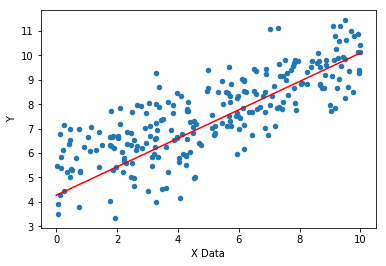

In [82]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!